<a href="https://colab.research.google.com/github/divakar9819/Deep_Learning_implementation/blob/master/Copy_of_padhAIContest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!unzip data.zip

Archive:  data.zip
  inflating: level_1_test/kaggle_level_1/0.jpg  
  inflating: level_1_test/kaggle_level_1/1.jpg  
  inflating: level_1_test/kaggle_level_1/10.jpg  
  inflating: level_1_test/kaggle_level_1/100.jpg  
  inflating: level_1_test/kaggle_level_1/101.jpg  
  inflating: level_1_test/kaggle_level_1/102.jpg  
  inflating: level_1_test/kaggle_level_1/103.jpg  
  inflating: level_1_test/kaggle_level_1/104.jpg  
  inflating: level_1_test/kaggle_level_1/105.jpg  
  inflating: level_1_test/kaggle_level_1/106.jpg  
  inflating: level_1_test/kaggle_level_1/107.jpg  
  inflating: level_1_test/kaggle_level_1/108.jpg  
  inflating: level_1_test/kaggle_level_1/109.jpg  
  inflating: level_1_test/kaggle_level_1/11.jpg  
  inflating: level_1_test/kaggle_level_1/110.jpg  
  inflating: level_1_test/kaggle_level_1/111.jpg  
  inflating: level_1_test/kaggle_level_1/112.jpg  
  inflating: level_1_test/kaggle_level_1/113.jpg  
  inflating: level_1_test/kaggle_level_1/114.jpg  
  inflating: level

In [0]:
import os
import sys
import pickle
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_squared_error, log_loss, confusion_matrix
import matplotlib.pyplot as plt

np.random.seed(100)

In [0]:
class SigmoidNeuron:
  
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self, x):
        return np.dot(x, self.w.T) + self.b

    def sigmoid(self, x):
        return 1.0/(1.0 + np.exp(-x))

    def grad_w_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred) * x

    def grad_b_mse(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred - y) * y_pred * (1 - y_pred)

    def grad_w_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))
        if y == 0:
            return y_pred * x
        elif y == 1:
            return -1 * (1 - y_pred) * x
        else:
            raise ValueError("y should be 0 or 1")
    def grad_b_ce(self, x, y):
        y_pred = self.sigmoid(self.perceptron(x))

        if y == 0:
            return y_pred 

        elif y == 1:
            return -1 * (1 - y_pred)

        else:
            raise ValueError("y should be 0 or 1")

  
    def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, loss_fn="mse", display_loss=False):    
        # initialise w, b
        if initialise:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0

        if display_loss:
              loss = {}

        for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
            dw = 0
            db = 0
            for x, y in zip(X, Y):
                if loss_fn == "mse":
                    dw += self.grad_w_mse(x, y)
                    db += self.grad_b_mse(x, y) 
                elif loss_fn == "ce":
                    dw += self.grad_w_ce(x, y)
                    db += self.grad_b_ce(x, y)
                self.w -= learning_rate * dw
                self.b -= learning_rate * db
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
            if loss_fn == "mse":
                loss[i] = mean_squared_error(Y, Y_pred)
            elif loss_fn == "ce":
                loss[i] = log_loss(Y, Y_pred)
        if display_loss:
            losses=[]
            for k,v in loss.items():
                losses.append(v)
            plt.plot(losses)
            plt.xlabel('Epochs')
            if loss_fn == "mse":
                plt.ylabel('Mean Squared Error')
            elif loss_fn == "ce":
                plt.ylabel('Log Loss')
            plt.show()

    def predict(self, X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [0]:
def read_all(folder_path, key_prefix=""):
    '''
    It returns a dictionary with 'file names' as keys and 'flattened image arrays' as values.
    '''
    print("Reading:")
    images = {}
    files = os.listdir(folder_path)
    for i, file_name in tqdm_notebook(enumerate(files), total=len(files)):
        file_path = os.path.join(folder_path, file_name)
        image_index = key_prefix + file_name[:-4]
        image = Image.open(file_path)
        image = image.convert("L")
        images[image_index] = np.array(image.copy()).flatten()
        image.close()
    return images

In [0]:
languages = ['ta', 'hi', 'en']
trainPath = "/content/level_1_train/level_1/"
testPath = "/content/level_1_test/kaggle_level_1"
images_train = read_all(trainPath+"background",key_prefix='bgr_') 
for language in languages:
    images_train.update(read_all(trainPath+language, key_prefix=language+"_" ))
print(len(images_train))
images_test = read_all(testPath, key_prefix='') 
print(len(images_test))

Reading:


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  



Reading:



Reading:



Reading:



892
Reading:



297


In [0]:
list(images_test.keys())[:5]

['158', '118', '138', '131', '282']

In [0]:
X_train = []
Y_train = []
for key, value in images_train.items():
    X_train.append(value)
    if key[:4] == "bgr_":
        Y_train.append(0)
    else:
        Y_train.append(1)

ID_test = []
X_test = []
for key, value in images_test.items():
    ID_test.append(int(key))
    X_test.append(value)
  
  
        
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)

print(X_train.shape, Y_train.shape)
print(X_test.shape)

(892, 256) (892,)
(297, 256)


In [0]:
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


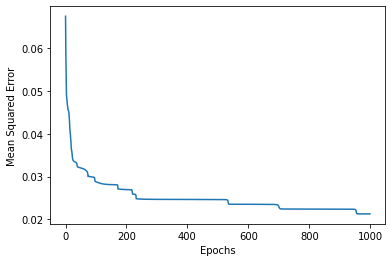

In [0]:
sn_mse = SigmoidNeuron()
sn_mse.fit(X_scaled_train, Y_train, epochs=1000, learning_rate=0.001, loss_fn="mse", display_loss=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:51: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path(

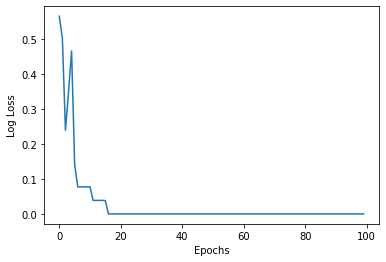

In [0]:
sn_ce = SigmoidNeuron()
sn_ce.fit(X_scaled_train, Y_train, epochs=100, learning_rate=0.015, loss_fn="ce", display_loss=True)

In [0]:
def print_accuracy(sn):
    Y_pred_train = sn.predict(X_scaled_train)
    Y_pred_binarised_train = (Y_pred_train >= 0.5).astype("int").ravel()
    accuracy_train = accuracy_score(Y_pred_binarised_train, Y_train)
    print("Train Accuracy : ", accuracy_train)
    print("-"*50)

In [0]:
print_accuracy(sn_mse)
print_accuracy(sn_ce)

Train Accuracy :  0.9786995515695067
--------------------------------------------------
Train Accuracy :  1.0
--------------------------------------------------


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


In [0]:
Y_pred_test = sn_ce.predict(X_scaled_test)
Y_pred_binarised_test = (Y_pred_test >= 0.5).astype("int").ravel()

submission = {}
submission['ImageId'] = ID_test
submission['Class'] = Y_pred_binarised_test

submission = pd.DataFrame(submission)
submission = submission[['ImageId', 'Class']]
submission = submission.sort_values(['ImageId'])
submission.to_csv("submisision.csv", index=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()
